In [1]:
# from utils.data_build import build_kru_dataframe_and_save

# df = build_kru_dataframe_and_save("/workspace/kru_data", "/workspace/kru_data/data_tag.json", "data_source.csv")

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib import rcParams
from matplotlib.patches import Rectangle

# Nature 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")  # 색맹 친화적 팔레트

# 고해상도 설정 (Nature 권장: 300 DPI)
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
rcParams['savefig.bbox'] = 'tight'
rcParams['font.size'] = 8
rcParams['axes.labelsize'] = 9
rcParams['axes.titlesize'] = 10
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 7
rcParams['figure.titlesize'] = 11
# 나눔 스퀘어 폰트 설정
rcParams['font.family'] = 'sans-serif'
# 나눔 스퀘어 폰트 우선순위 설정 (여러 변형 시도)
rcParams['font.sans-serif'] = ['NanumSquare', 'NanumSquareOTF', 'NanumSquareNeo', 'NanumGothic', 'DejaVu Sans']
rcParams['axes.unicode_minus'] = False

# 폰트 확인 및 설정
try:
    from matplotlib import font_manager
    # 사용 가능한 나눔 스퀘어 폰트 찾기
    available_fonts = [f.name for f in font_manager.fontManager.ttflist]
    nanum_fonts = [f for f in available_fonts if 'Nanum' in f and 'Square' in f]
    if nanum_fonts:
        print(f"✓ 나눔 스퀘어 폰트 발견: {nanum_fonts[0]}")
        rcParams['font.sans-serif'] = [nanum_fonts[0]] + rcParams['font.sans-serif']
    else:
        print("⚠ 나눔 스퀘어 폰트를 찾을 수 없습니다. 기본 폰트를 사용합니다.")
        print(f"사용 가능한 나눔 폰트: {[f for f in available_fonts if 'Nanum' in f]}")
except Exception as e:
    print(f"폰트 확인 중 오류: {e}")
    print("기본 폰트 설정을 사용합니다.")
rcParams['axes.linewidth'] = 0.5
rcParams['grid.linewidth'] = 0.5
rcParams['lines.linewidth'] = 1.0

# 색상 팔레트 (Nature 스타일, 색맹 친화적)
nature_colors = {
    'blue': '#2E86AB',
    'orange': '#F24236',
    'green': '#6A994E',
    'red': '#BC4749',
    'purple': '#7209B7',
    'yellow': '#F77F00',
    'teal': '#06A77D',
    'pink': '#D62828'
}

# figures 디렉토리 생성
os.makedirs('/workspace/notebook/figures', exist_ok=True)

# data_tag.json 로드
import simdjson as json
with open('/workspace/kru_data/data_tag.json', 'r', encoding='utf-8') as f:
    tag_data = json.loads(f.read())

# 카테고리별 순서 및 설명 추출
category_info = {}
for key, value in tag_data.items():
    col_name = key.strip()
    category_info[col_name] = {
        'description': value.get('description', ''),
        'order': value.get('-index_order', 0),
        'values': value.get('values', {})
    }

all_df = pd.read_csv("/workspace/kru_data/data_source.csv")

print(f"총 데이터 수: {len(all_df):,}개")
print(f"컬럼 수: {len(all_df.columns)}개")
print("\n카테고리 정보:")
for col, info in category_info.items():
    print(f"  {col}: {info['description']}")

✓ 나눔 스퀘어 폰트 발견: NanumSquareRound
총 데이터 수: 1,272,625개
컬럼 수: 6개

카테고리 정보:
  데이터_항목: 데이터 수집 주체 구분
  데이터_카테고리: 데이터 수집 대상 직업군
  성별: 참여자 성별 구분
  연령: 연령대 구분
  지역: 참여자 지역 구분


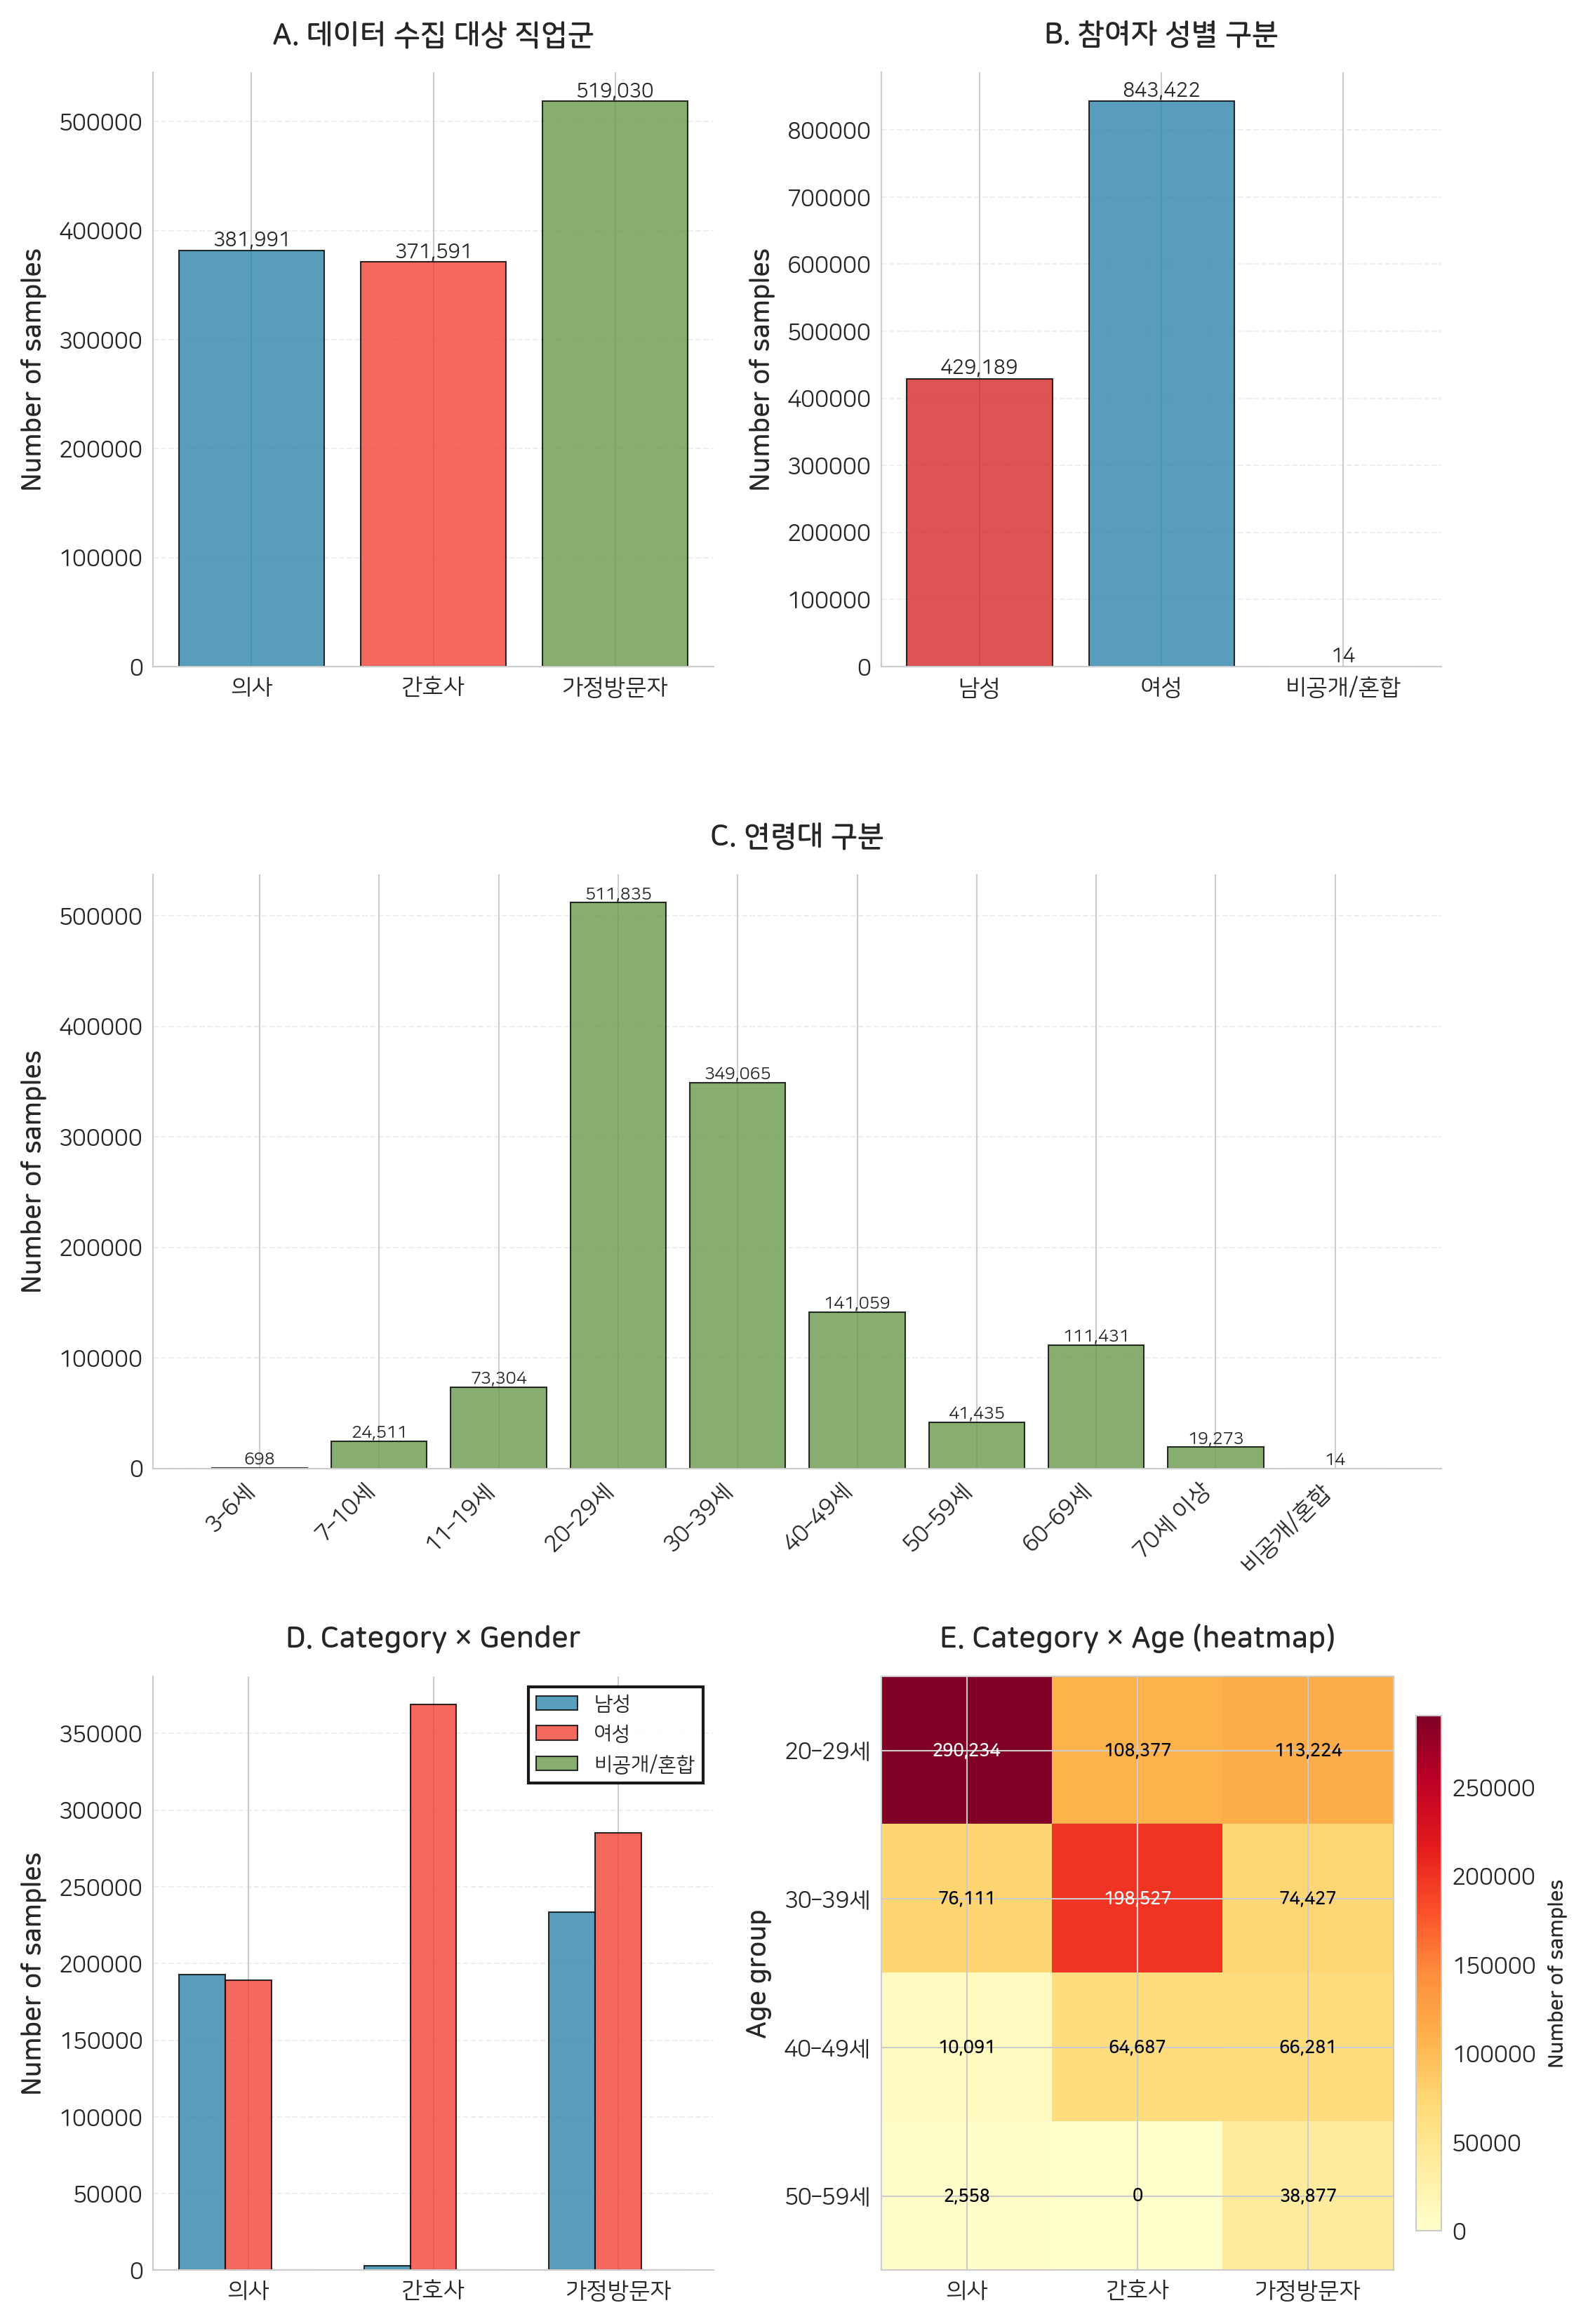

✓ Figure 1 saved: Figure1_Dataset_Overview.png & .pdf
  (data_tag.json 기반 카테고리 순서 및 설명 적용)


In [3]:
# ============================================================================
# Figure 1: Dataset Overview and Demographic Distribution
# Nature-style publication figure (data_tag.json 기반)
# ============================================================================

# data_tag.json의 values 순서대로 정렬
def get_ordered_values(col_name):
    """data_tag.json의 values 순서대로 카테고리 값 반환"""
    if col_name not in category_info:
        return all_df[col_name].value_counts().index.tolist()
    
    values_dict = category_info[col_name]['values']
    # values_dict의 값(value) 순서대로 정렬
    ordered = list(values_dict.values())
    # 실제 데이터에 있는 값만 필터링
    return [v for v in ordered if v in all_df[col_name].values]

# 데이터 준비 (data_tag.json 순서대로 정렬)
카테고리_순서 = get_ordered_values('데이터_카테고리')
카테고리_분포 = all_df['데이터_카테고리'].value_counts().reindex(카테고리_순서)

성별_순서 = get_ordered_values('성별')
성별_분포 = all_df['성별'].value_counts().reindex(성별_순서)

연령_순서 = get_ordered_values('연령')
연령_분포 = all_df['연령'].value_counts().reindex(연령_순서)

지역_순서 = get_ordered_values('지역')
지역_분포 = all_df['지역'].value_counts().reindex(지역_순서)

항목_순서 = get_ordered_values('데이터_항목')
항목_분포 = all_df['데이터_항목'].value_counts().reindex(항목_순서)

# 교차 분석 데이터 (순서 유지)
교차_카테고리_성별 = pd.crosstab(all_df['데이터_카테고리'], all_df['성별'])
교차_카테고리_성별 = 교차_카테고리_성별.reindex(카테고리_순서).reindex(columns=성별_순서)

교차_카테고리_연령 = pd.crosstab(all_df['데이터_카테고리'], all_df['연령'])
교차_카테고리_연령 = 교차_카테고리_연령.reindex(카테고리_순서).reindex(columns=연령_순서)

# Figure 생성 (Nature 스타일: 2열 3행 레이아웃)
fig = plt.figure(figsize=(7.2, 12))  # Nature 권장 너비: 89mm (3.5인치) 또는 183mm (7.2인치)
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3, left=0.1, right=0.95, top=0.95, bottom=0.08)

# A: 데이터_카테고리 분포 (data_tag.json: 데이터 수집 대상 직업군)
ax1 = fig.add_subplot(gs[0, 0])
bars1 = ax1.bar(range(len(카테고리_분포)), 카테고리_분포.values, 
                color=[nature_colors['blue'], nature_colors['orange'], nature_colors['green']],
                edgecolor='black', linewidth=0.5, alpha=0.8)
ax1.set_xticks(range(len(카테고리_분포)))
ax1.set_xticklabels(카테고리_분포.index, rotation=0)
ax1.set_ylabel('Number of samples', fontweight='bold')
ax1.set_title('A. ' + category_info['데이터_카테고리']['description'], fontweight='bold', pad=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# 값 표시
for i, (bar, val) in enumerate(zip(bars1, 카테고리_분포.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, val, f'{val:,}',
             ha='center', va='bottom', fontsize=7)
ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# B: 성별 분포 (data_tag.json: 참여자 성별 구분)
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.bar(range(len(성별_분포)), 성별_분포.values,
                color=[nature_colors['pink'], nature_colors['blue'], nature_colors['teal']],
                edgecolor='black', linewidth=0.5, alpha=0.8)
ax2.set_xticks(range(len(성별_분포)))
ax2.set_xticklabels(성별_분포.index, rotation=0)
ax2.set_ylabel('Number of samples', fontweight='bold')
ax2.set_title('B. ' + category_info['성별']['description'], fontweight='bold', pad=10)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
for i, (bar, val) in enumerate(zip(bars2, 성별_분포.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, val, f'{val:,}',
             ha='center', va='bottom', fontsize=7)
ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# C: 연령대 분포 (data_tag.json: 연령대 구분)
ax3 = fig.add_subplot(gs[1, :])
bars3 = ax3.bar(range(len(연령_분포)), 연령_분포.values,
                color=nature_colors['green'], edgecolor='black', linewidth=0.5, alpha=0.8)
ax3.set_xticks(range(len(연령_분포)))
ax3.set_xticklabels(연령_분포.index, rotation=45, ha='right')
ax3.set_ylabel('Number of samples', fontweight='bold')
ax3.set_title('C. ' + category_info['연령']['description'], fontweight='bold', pad=10)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
for i, (bar, val) in enumerate(zip(bars3, 연령_분포.values)):
    ax3.text(bar.get_x() + bar.get_width()/2, val, f'{val:,}',
             ha='center', va='bottom', fontsize=6, rotation=0)
ax3.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# D: 카테고리 × 성별 교차 분석
ax4 = fig.add_subplot(gs[2, 0])
x_pos = np.arange(len(교차_카테고리_성별.index))
width = 0.25
for i, col in enumerate(교차_카테고리_성별.columns):
    ax4.bar(x_pos + i*width, 교차_카테고리_성별[col].values, width,
            label=col, color=list(nature_colors.values())[i],
            edgecolor='black', linewidth=0.5, alpha=0.8)
ax4.set_xticks(x_pos + width)
ax4.set_xticklabels(교차_카테고리_성별.index, rotation=0)
ax4.set_ylabel('Number of samples', fontweight='bold')
ax4.set_title('D. Category × Gender', fontweight='bold', pad=10)
ax4.legend(frameon=True, fancybox=False, edgecolor='black', framealpha=0.9)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# E: 카테고리 × 연령대 히트맵 (주요 연령대만 - data_tag.json 순서 유지)
ax5 = fig.add_subplot(gs[2, 1])
# 주요 연령대 선택 (20-29, 30-39, 40-49, 50-59)
주요_연령 = ['20–29세', '30–39세', '40–49세', '50–59세']
히트맵_데이터 = 교차_카테고리_연령[[x for x in 주요_연령 if x in 교차_카테고리_연령.columns]].T
im = ax5.imshow(히트맵_데이터.values, cmap='YlOrRd', aspect='auto', vmin=0)
ax5.set_xticks(range(len(히트맵_데이터.columns)))
ax5.set_xticklabels(히트맵_데이터.columns, rotation=0)
ax5.set_yticks(range(len(히트맵_데이터.index)))
ax5.set_yticklabels(히트맵_데이터.index, rotation=0)
ax5.set_ylabel('Age group', fontweight='bold')
ax5.set_title('E. Category × Age (heatmap)', fontweight='bold', pad=10)
# 값 표시
for i in range(len(히트맵_데이터.index)):
    for j in range(len(히트맵_데이터.columns)):
        val = int(히트맵_데이터.iloc[i, j])
        text_color = 'white' if val > 히트맵_데이터.values.max() * 0.5 else 'black'
        text = ax5.text(j, i, f'{val:,}',
                       ha="center", va="center", color=text_color, fontsize=6, fontweight='bold')
# 컬러바
cbar = plt.colorbar(im, ax=ax5, fraction=0.046, pad=0.04)
cbar.set_label('Number of samples', fontsize=7, fontweight='bold')

# # 전체 제목
# fig.suptitle(f'Dataset Overview (N = {len(all_df):,})', 
#              fontsize=12, fontweight='bold', y=0.98)

# 저장
plt.savefig('/workspace/notebook/figures/Figure1_Dataset_Overview.png', 
            dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.savefig('/workspace/notebook/figures/Figure1_Dataset_Overview.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()

print("✓ Figure 1 saved: Figure1_Dataset_Overview.png & .pdf")
print("  (data_tag.json 기반 카테고리 순서 및 설명 적용)")


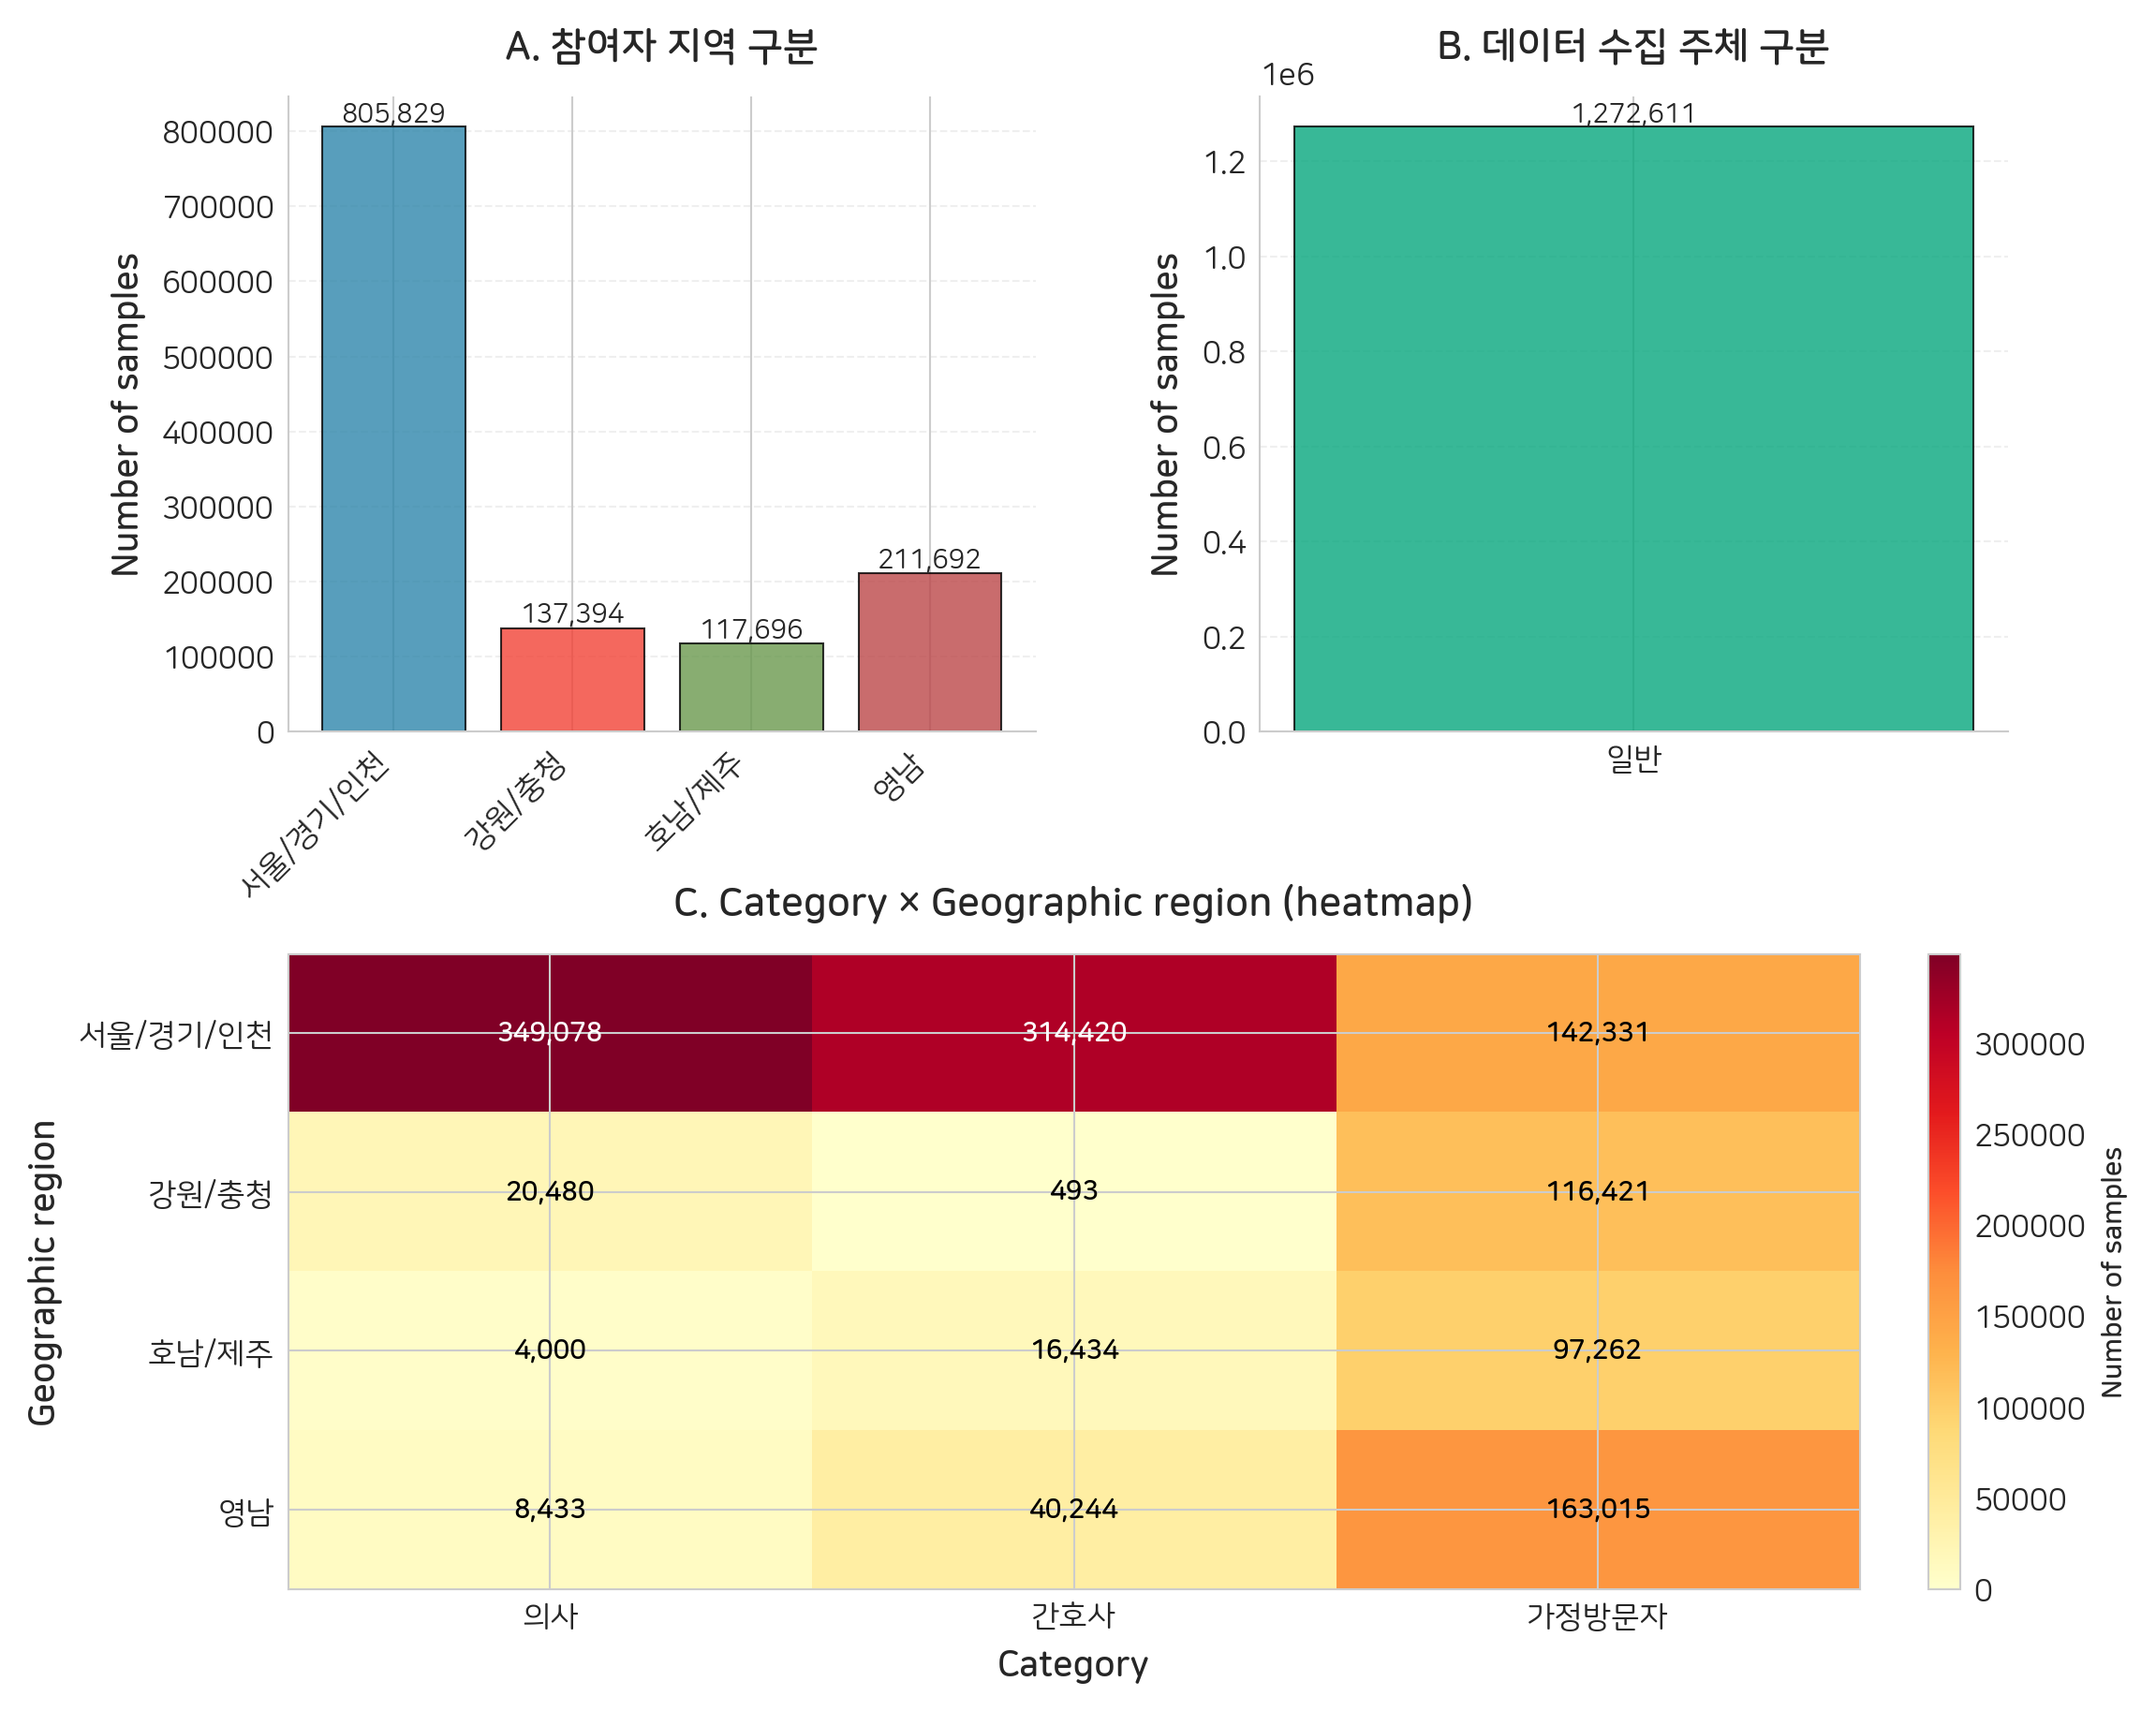

✓ Figure 2 saved: Figure2_Geographic_Distribution.png & .pdf
  (data_tag.json 기반 카테고리 순서 및 설명 적용)


In [4]:
# ============================================================================
# Figure 2: Geographic and Category Distribution
# Nature-style publication figure (data_tag.json 기반)
# ============================================================================

# 데이터 준비 (data_tag.json 순서 유지)
지역_분포 = all_df['지역'].value_counts().reindex(지역_순서)
교차_카테고리_지역 = pd.crosstab(all_df['데이터_카테고리'], all_df['지역'])
교차_카테고리_지역 = 교차_카테고리_지역.reindex(카테고리_순서).reindex(columns=지역_순서)
항목_분포 = all_df['데이터_항목'].value_counts().reindex(항목_순서)

# Figure 생성
fig = plt.figure(figsize=(7.2, 6.4))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3, left=0.1, right=0.95, top=0.93, bottom=0.1)

# A: 지역 분포 (data_tag.json: 참여자 지역 구분)
ax1 = fig.add_subplot(gs[0, 0])
bars1 = ax1.bar(range(len(지역_분포)), 지역_분포.values,
                color=[nature_colors['blue'], nature_colors['orange'], nature_colors['green'], 
                       nature_colors['red'], nature_colors['purple']],
                edgecolor='black', linewidth=0.5, alpha=0.8)
ax1.set_xticks(range(len(지역_분포)))
ax1.set_xticklabels(지역_분포.index, rotation=45, ha='right')
ax1.set_ylabel('Number of samples', fontweight='bold')
ax1.set_title('A. ' + category_info['지역']['description'], fontweight='bold', pad=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for i, (bar, val) in enumerate(zip(bars1, 지역_분포.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, val, f'{val:,}',
             ha='center', va='bottom', fontsize=7)
ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# B: 데이터_항목 분포 (data_tag.json: 데이터 수집 주체 구분)
ax2 = fig.add_subplot(gs[0, 1])
bars2 = ax2.bar(range(len(항목_분포)), 항목_분포.values,
                color=[nature_colors['teal'], nature_colors['yellow'], nature_colors['pink']],
                edgecolor='black', linewidth=0.5, alpha=0.8)
ax2.set_xticks(range(len(항목_분포)))
ax2.set_xticklabels(항목_분포.index, rotation=0)
ax2.set_ylabel('Number of samples', fontweight='bold')
ax2.set_title('B. ' + category_info['데이터_항목']['description'], fontweight='bold', pad=10)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
for i, (bar, val) in enumerate(zip(bars2, 항목_분포.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, val, f'{val:,}',
             ha='center', va='bottom', fontsize=7)
ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# C: 카테고리 × 지역 히트맵
ax3 = fig.add_subplot(gs[1, :])
히트맵_데이터2 = 교차_카테고리_지역.T
im = ax3.imshow(히트맵_데이터2.values, cmap='YlOrRd', aspect='auto', vmin=0)
ax3.set_xticks(range(len(히트맵_데이터2.columns)))
ax3.set_xticklabels(히트맵_데이터2.columns, rotation=0)
ax3.set_yticks(range(len(히트맵_데이터2.index)))
ax3.set_yticklabels(히트맵_데이터2.index, rotation=0)
ax3.set_ylabel('Geographic region', fontweight='bold')
ax3.set_xlabel('Category', fontweight='bold')
ax3.set_title('C. Category × Geographic region (heatmap)', fontweight='bold', pad=10)
# 값 표시
for i in range(len(히트맵_데이터2.index)):
    for j in range(len(히트맵_데이터2.columns)):
        val = int(히트맵_데이터2.iloc[i, j])
        text_color = 'white' if val > 히트맵_데이터2.values.max() * 0.5 else 'black'
        ax3.text(j, i, f'{val:,}',
                ha="center", va="center", color=text_color, fontsize=7, fontweight='bold')
# 컬러바
cbar = plt.colorbar(im, ax=ax3, fraction=0.046, pad=0.04)
cbar.set_label('Number of samples', fontsize=7, fontweight='bold')

# 저장
plt.savefig('/workspace/notebook/figures/Figure2_Geographic_Distribution.png', 
            dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.savefig('/workspace/notebook/figures/Figure2_Geographic_Distribution.pdf', 
            dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()

print("✓ Figure 2 saved: Figure2_Geographic_Distribution.png & .pdf")
print("  (data_tag.json 기반 카테고리 순서 및 설명 적용)")


In [7]:
# ============================================================================
# 논문용 통합 통계 테이블 생성 (하나의 테이블)
# ============================================================================

# data_tag.json 순서대로 정렬 함수
def get_ordered_values(col_name):
    """data_tag.json의 values 순서대로 카테고리 값 반환"""
    if col_name not in category_info:
        return all_df[col_name].value_counts().index.tolist()
    values_dict = category_info[col_name]['values']
    ordered = list(values_dict.values())
    return [v for v in ordered if v in all_df[col_name].values]

# 전체 데이터 개수
total_n = len(all_df)

# 통합 테이블 생성
table_rows = []

# 데이터_카테고리
카테고리_순서 = get_ordered_values('데이터_카테고리')
카테고리_분포 = all_df['데이터_카테고리'].value_counts().reindex(카테고리_순서)
for idx, (cat, n) in enumerate(카테고리_분포.items()):
    pct = (n / total_n * 100)
    if idx == 0:
        table_rows.append({
            'Category': 'Category',
            'Value': cat,
            'N': n,
            '%': pct
        })
    else:
        table_rows.append({
            'Category': '',
            'Value': cat,
            'N': n,
            '%': pct
        })

# 성별
성별_순서 = get_ordered_values('성별')
성별_분포 = all_df['성별'].value_counts().reindex(성별_순서)
for idx, (gender, n) in enumerate(성별_분포.items()):
    pct = (n / total_n * 100)
    if idx == 0:
        table_rows.append({
            'Category': 'Gender',
            'Value': gender,
            'N': n,
            '%': pct
        })
    else:
        table_rows.append({
            'Category': '',
            'Value': gender,
            'N': n,
            '%': pct
        })

# 연령
연령_순서 = get_ordered_values('연령')
연령_분포 = all_df['연령'].value_counts().reindex(연령_순서)
for idx, (age, n) in enumerate(연령_분포.items()):
    pct = (n / total_n * 100)
    if idx == 0:
        table_rows.append({
            'Category': 'Age group',
            'Value': age,
            'N': n,
            '%': pct
        })
    else:
        table_rows.append({
            'Category': '',
            'Value': age,
            'N': n,
            '%': pct
        })

# 지역
지역_순서 = get_ordered_values('지역')
지역_분포 = all_df['지역'].value_counts().reindex(지역_순서)
for idx, (region, n) in enumerate(지역_분포.items()):
    pct = (n / total_n * 100)
    if idx == 0:
        table_rows.append({
            'Category': 'Geographic region',
            'Value': region,
            'N': n,
            '%': pct
        })
    else:
        table_rows.append({
            'Category': '',
            'Value': region,
            'N': n,
            '%': pct
        })

# 데이터_항목
항목_순서 = get_ordered_values('데이터_항목')
항목_분포 = all_df['데이터_항목'].value_counts().reindex(항목_순서)
for idx, (item, n) in enumerate(항목_분포.items()):
    pct = (n / total_n * 100)
    if idx == 0:
        table_rows.append({
            'Category': 'Data collection type',
            'Value': item,
            'N': n,
            '%': pct
        })
    else:
        table_rows.append({
            'Category': '',
            'Value': item,
            'N': n,
            '%': pct
        })

# DataFrame 생성
unified_table = pd.DataFrame(table_rows)

# 전체 합계 행 추가
unified_table = pd.concat([
    unified_table,
    pd.DataFrame([{
        'Category': 'Total',
        'Value': '',
        'N': total_n,
        '%': 100.0
    }])
], ignore_index=True)

# 포맷팅
unified_table_display = unified_table.copy()
unified_table_display['N'] = unified_table_display['N'].apply(lambda x: f'{int(x):,}' if pd.notna(x) else '')
unified_table_display['%'] = unified_table_display['%'].apply(lambda x: f'{x:.2f}' if pd.notna(x) else '')

print("="*80)
print("Dataset Distribution Table")
print("="*80)
print(f"Total N = {total_n:,}")
print("="*80)
print(unified_table_display.to_string(index=False))
print("="*80)
display(unified_table_display)

Dataset Distribution Table
Total N = 1,272,625
            Category    Value         N      %
            Category       의사   381,991  30.02
                          간호사   371,591  29.20
                        가정방문자   519,030  40.78
              Gender       남성   429,189  33.72
                           여성   843,422  66.27
                       비공개/혼합        14   0.00
           Age group     3–6세       698   0.05
                        7–10세    24,511   1.93
                       11–19세    73,304   5.76
                       20–29세   511,835  40.22
                       30–39세   349,065  27.43
                       40–49세   141,059  11.08
                       50–59세    41,435   3.26
                       60–69세   111,431   8.76
                       70세 이상    19,273   1.51
                       비공개/혼합        14   0.00
   Geographic region 서울/경기/인천   805,829  63.32
                        강원/충청   137,394  10.80
                        호남/제주   117,696   9.25
             

,Category,Value,N,%
0,Category,의사,"381,991",30.02
1,,간호사,"371,591",29.20
2,,가정방문자,"519,030",40.78
3,Gender,남성,"429,189",33.72
4,,여성,"843,422",66.27
5,,비공개/혼합,14,0.00
6,Age group,3–6세,698,0.05
7,,7–10세,"24,511",1.93
8,,11–19세,"73,304",5.76
9,,20–29세,"511,835",40.22


In [8]:
all_df

,abs_path,데이터_항목,데이터_카테고리,성별,연령,지역
0,/workspace/kru_data/원천데이터/의사/HB_0316/HB_0316-1...,일반,의사,여성,20–29세,서울/경기/인천
1,/workspace/kru_data/원천데이터/의사/HB_0316/HB_0316-1...,일반,의사,여성,20–29세,서울/경기/인천
2,/workspace/kru_data/원천데이터/의사/HB_0316/HB_0316-1...,일반,의사,여성,20–29세,서울/경기/인천
3,/workspace/kru_data/원천데이터/의사/HB_0316/HB_0316-1...,일반,의사,여성,20–29세,서울/경기/인천
4,/workspace/kru_data/원천데이터/의사/HB_0316/HB_0316-1...,일반,의사,여성,20–29세,서울/경기/인천
...,...,...,...,...,...,...
1272620,/workspace/kru_data/원천데이터/간호사/HA_0330/HA_0330-...,일반,간호사,여성,30–39세,서울/경기/인천
1272621,/workspace/kru_data/원천데이터/간호사/HA_0330/HA_0330-...,일반,간호사,여성,30–39세,서울/경기/인천
1272622,/workspace/kru_data/원천데이터/간호사/HA_0330/HA_0330-...,일반,간호사,여성,30–39세,서울/경기/인천
1272623,/workspace/kru_data/원천데이터/간호사/HA_0330/HA_0330-...,일반,간호사,여성,30–39세,서울/경기/인천


In [6]:
# 테이블을 CSV 및 LaTeX 형식으로 저장
tables_dir = '/workspace/notebook/tables'
os.makedirs(tables_dir, exist_ok=True)

# 통합 테이블 저장 (CSV)
unified_table_display.to_csv(f'{tables_dir}/Dataset_Distribution_Table.csv', index=False, encoding='utf-8-sig')
print(f"\n✓ CSV table saved: {tables_dir}/Dataset_Distribution_Table.csv")

# LaTeX 형식으로 저장 (논문 작성용)
def df_to_latex(df, filename, caption, label):
    """DataFrame을 LaTeX 테이블 형식으로 변환"""
    try:
        # LaTeX 형식으로 변환 (숫자 포맷팅)
        df_latex = df.copy()
        df_latex['N'] = df_latex['N'].apply(lambda x: f'{int(x):,}' if pd.notna(x) and x != '' else '')
        df_latex['%'] = df_latex['%'].apply(lambda x: f'{x:.2f}' if pd.notna(x) and x != '' else '')
        
        latex_str = df_latex.to_latex(index=False, escape=False, na_rep='')
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(f"\\begin{{table}}[h]\n")
            f.write(f"\\centering\n")
            f.write(latex_str)
            f.write(f"\\caption{{{caption}}}\n")
            f.write(f"\\label{{{label}}}\n")
            f.write(f"\\end{{table}}\n")
        print(f"✓ LaTeX table saved: {filename}")
    except Exception as e:
        print(f"⚠ LaTeX table generation failed for {filename}: {e}")

# LaTeX 테이블 생성
df_to_latex(unified_table_display, f'{tables_dir}/Dataset_Distribution_Table.tex',
            'Dataset Distribution (N = ' + f'{total_n:,}' + ')', 'tab:dataset_distribution')

print("\n" + "="*80)
print("Unified table saved successfully!")
print(f"Location: {tables_dir}/Dataset_Distribution_Table.*")
print("="*80)

# Table 3 저장
교차_카테고리_성별.to_csv(f'{tables_dir}/Table3_Category_Gender_CrossTab.csv', encoding='utf-8-sig')
교차_카테고리_성별_비율.round(2).to_csv(f'{tables_dir}/Table3_Category_Gender_CrossTab_Percentage.csv', encoding='utf-8-sig')
print(f"✓ Table 3 saved: {tables_dir}/Table3_*.csv")

# Table 4 저장
교차_카테고리_연령.to_csv(f'{tables_dir}/Table4_Category_Age_CrossTab.csv', encoding='utf-8-sig')
print(f"✓ Table 4 saved: {tables_dir}/Table4_*.csv")

# Table 5 저장
교차_카테고리_지역.to_csv(f'{tables_dir}/Table5_Category_Region_CrossTab.csv', encoding='utf-8-sig')
print(f"✓ Table 5 saved: {tables_dir}/Table5_*.csv")

# LaTeX 형식으로도 저장 (논문 작성용)
def df_to_latex(df, filename, caption, label, index=False):
    """DataFrame을 LaTeX 테이블 형식으로 변환"""
    try:
        latex_str = df.to_latex(index=index, escape=False)
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(f"\\begin{{table}}[h]\n")
            f.write(f"\\centering\n")
            f.write(latex_str)
            f.write(f"\\caption{{{caption}}}\n")
            f.write(f"\\label{{{label}}}\n")
            f.write(f"\\end{{table}}\n")
        print(f"✓ LaTeX table saved: {filename}")
    except Exception as e:
        print(f"⚠ LaTeX table generation failed for {filename}: {e}")

# LaTeX 테이블 생성
df_to_latex(summary_table, f'{tables_dir}/Table1_Dataset_Summary.tex', 
            'Dataset Summary Statistics', 'tab:dataset_summary', index=False)
df_to_latex(category_dist_table, f'{tables_dir}/Table2_Category_Distribution.tex',
            'Category Distribution', 'tab:category_dist', index=False)
df_to_latex(gender_dist_table, f'{tables_dir}/Table2_Gender_Distribution.tex',
            'Gender Distribution', 'tab:gender_dist', index=False)
df_to_latex(age_dist_table, f'{tables_dir}/Table2_Age_Distribution.tex',
            'Age Group Distribution', 'tab:age_dist', index=False)
df_to_latex(region_dist_table, f'{tables_dir}/Table2_Region_Distribution.tex',
            'Geographic Region Distribution', 'tab:region_dist', index=False)

# 교차 분석 테이블도 LaTeX로 저장
try:
    with open(f'{tables_dir}/Table3_Category_Gender_CrossTab.tex', 'w', encoding='utf-8') as f:
        f.write("\\begin{table}[h]\n\\centering\n")
        f.write(교차_카테고리_성별.to_latex(float_format='%.0f'))
        f.write("\\caption{Cross-tabulation: Category × Gender}\n")
        f.write("\\label{tab:category_gender_crosstab}\n")
        f.write("\\end{table}\n")
    print(f"✓ LaTeX table saved: {tables_dir}/Table3_Category_Gender_CrossTab.tex")
    
    with open(f'{tables_dir}/Table4_Category_Age_CrossTab.tex', 'w', encoding='utf-8') as f:
        f.write("\\begin{table}[h]\n\\centering\n")
        f.write(교차_카테고리_연령.to_latex(float_format='%.0f'))
        f.write("\\caption{Cross-tabulation: Category × Age Group}\n")
        f.write("\\label{tab:category_age_crosstab}\n")
        f.write("\\end{table}\n")
    print(f"✓ LaTeX table saved: {tables_dir}/Table4_Category_Age_CrossTab.tex")
    
    with open(f'{tables_dir}/Table5_Category_Region_CrossTab.tex', 'w', encoding='utf-8') as f:
        f.write("\\begin{table}[h]\n\\centering\n")
        f.write(교차_카테고리_지역.to_latex(float_format='%.0f'))
        f.write("\\caption{Cross-tabulation: Category × Geographic Region}\n")
        f.write("\\label{tab:category_region_crosstab}\n")
        f.write("\\end{table}\n")
    print(f"✓ LaTeX table saved: {tables_dir}/Table5_Category_Region_CrossTab.tex")
except Exception as e:
    print(f"⚠ LaTeX table generation failed: {e}")

print("\n" + "="*80)
print("All tables saved successfully!")
print(f"Location: {tables_dir}/")
print("="*80)



✓ CSV table saved: /workspace/notebook/tables/Dataset_Distribution_Table.csv
⚠ LaTeX table generation failed for /workspace/notebook/tables/Dataset_Distribution_Table.tex: invalid literal for int() with base 10: '381,991'

Unified table saved successfully!
Location: /workspace/notebook/tables/Dataset_Distribution_Table.*


NameError: name '교차_카테고리_성별_비율' is not defined

7. 데이터_카테고리 × 연령대 교차 분석
연령        11–19세  20–29세  30–39세  3–6세  40–49세  50–59세  60–69세  70세 이상  7–10세  \
데이터_카테고리                                                                        
99             0       0       0     0       0       0       0       0      0   
가정방문자      71304  113224   74427   698   66281   38877  110434   19273  24511   
간호사            0  108377  198527     0   64687       0       0       0      0   
의사          2000  290234   76111     0   10091    2558     997       0      0   
All        73304  511835  349065   698  141059   41435  111431   19273  24511   

연령        비공개/혼합      All  
데이터_카테고리                   
99            13       13  
가정방문자          1   519030  
간호사            0   371591  
의사             0   381991  
All           14  1272625  


<Figure size 4200x1800 with 0 Axes>

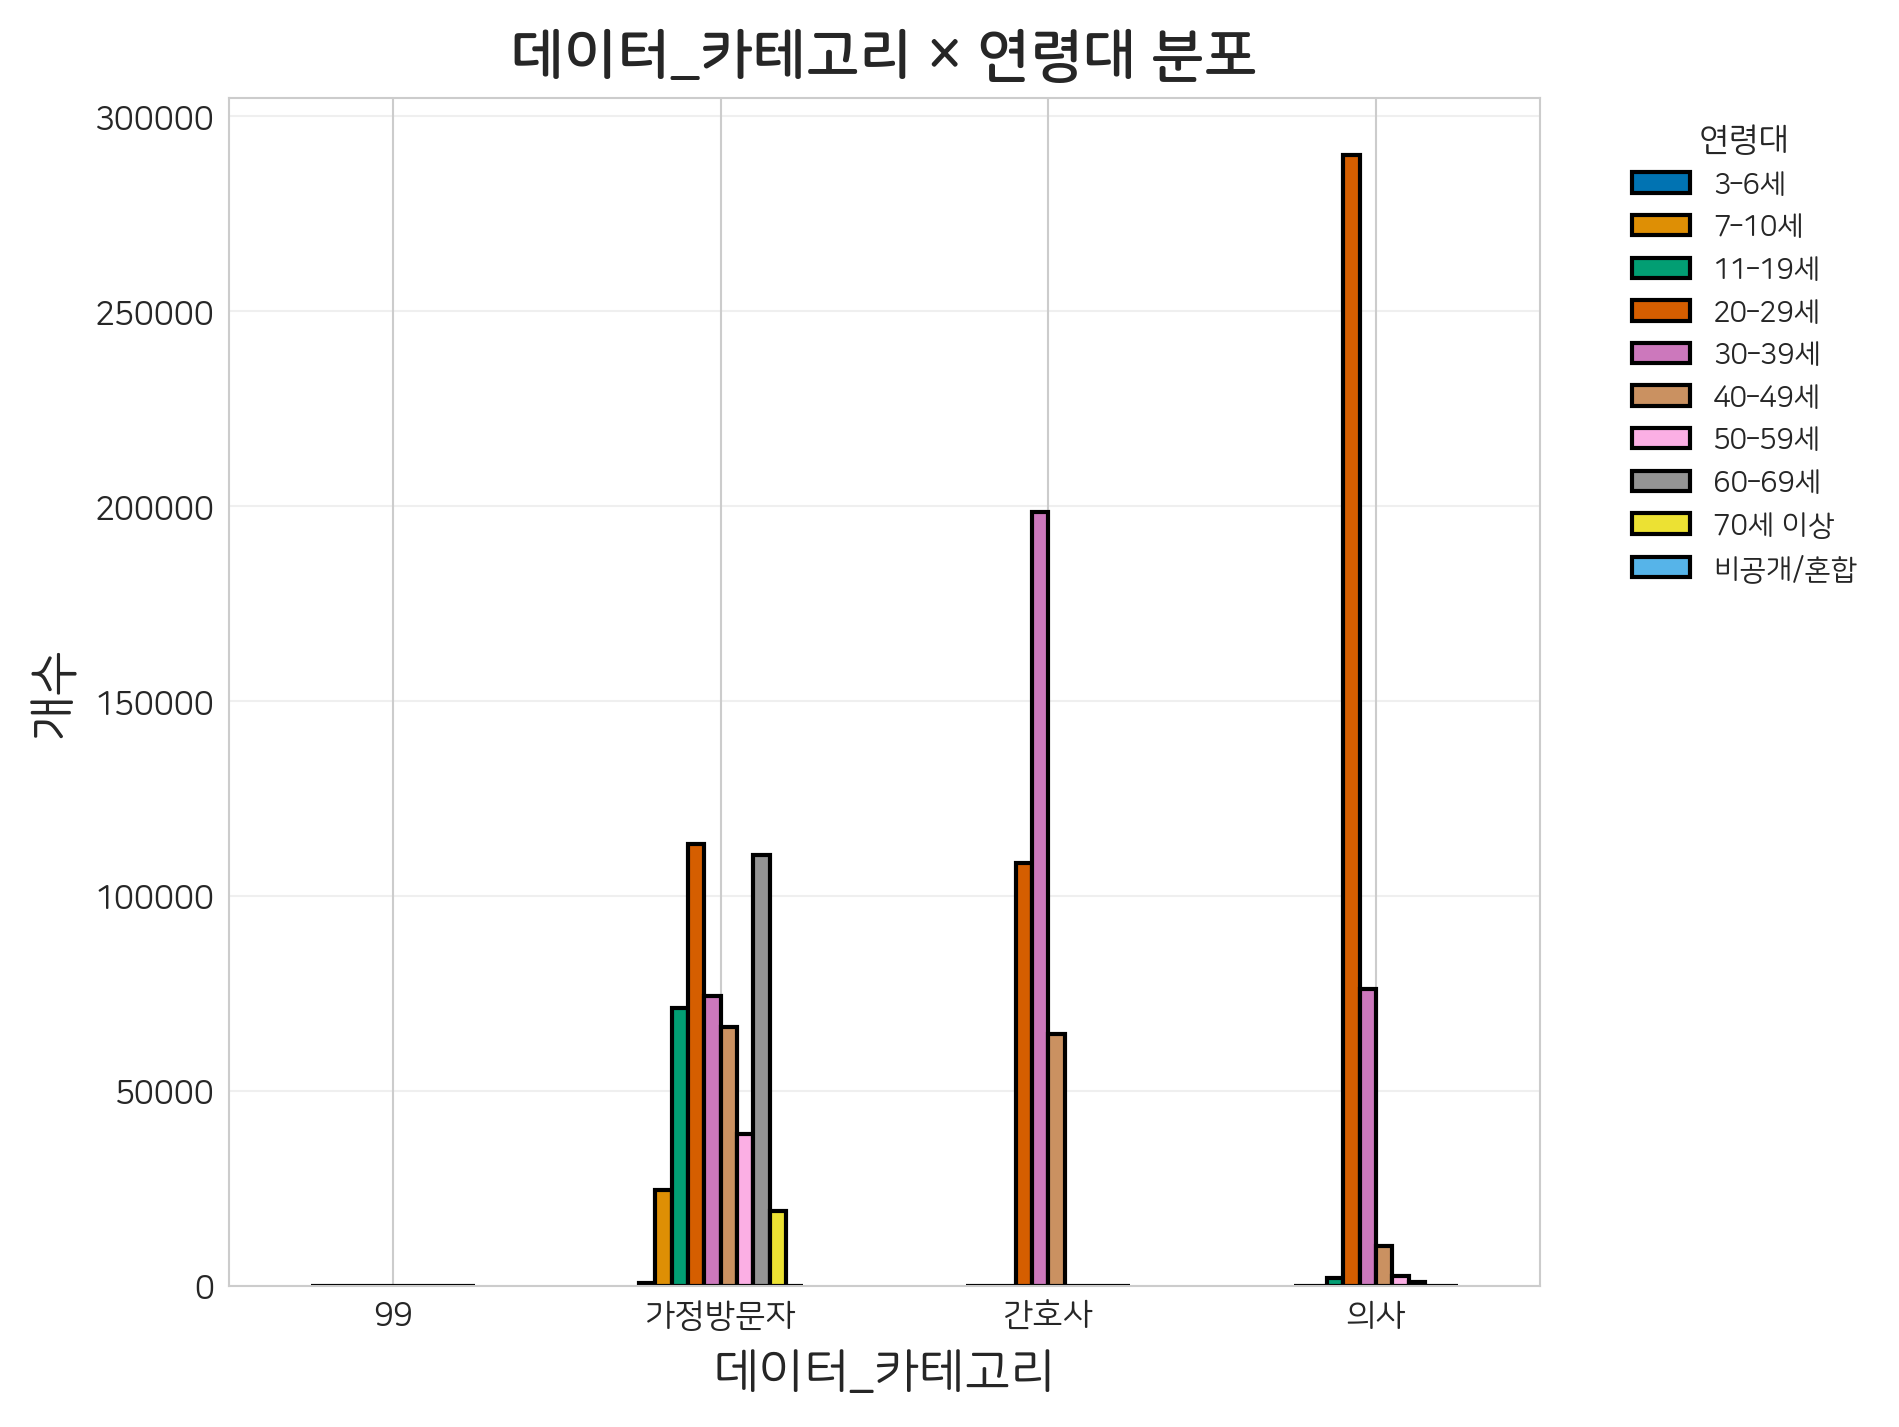

In [ ]:
# 교차 분석: 데이터_카테고리 vs 연령대
print("=" * 80)
print("7. 데이터_카테고리 × 연령대 교차 분석")
print("=" * 80)
교차_카테고리_연령 = pd.crosstab(all_df['데이터_카테고리'], all_df['연령'], margins=True)
print(교차_카테고리_연령)

plt.figure(figsize=(14, 6))
연령_순서 = ['3–6세', '7–10세', '11–19세', '20–29세', '30–39세', '40–49세', '50–59세', '60–69세', '70세 이상', '비공개/혼합']
연령_순서_필터 = [x for x in 연령_순서 if x in all_df['연령'].values]
pd.crosstab(all_df['데이터_카테고리'], all_df['연령'])[연령_순서_필터].plot(kind='bar', edgecolor='black')
plt.title('데이터_카테고리 × 연령대 분포', fontsize=14, fontweight='bold')
plt.xlabel('데이터_카테고리', fontsize=12)
plt.ylabel('개수', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# 요약 통계표
print("=" * 80)
print("10. 전체 요약 통계")
print("=" * 80)

요약_통계 = pd.DataFrame({
    '총 개수': [
        len(all_df),
        len(all_df['데이터_항목'].unique()),
        len(all_df['데이터_카테고리'].unique()),
        len(all_df['성별'].unique()),
        len(all_df['연령'].unique()),
        len(all_df['지역'].unique())
    ],
    '고유값 수': [
        '-',
        len(all_df['데이터_항목'].unique()),
        len(all_df['데이터_카테고리'].unique()),
        len(all_df['성별'].unique()),
        len(all_df['연령'].unique()),
        len(all_df['지역'].unique())
    ]
}, index=['전체 데이터', '데이터_항목', '데이터_카테고리', '성별', '연령', '지역'])

print(요약_통계)
print("\n각 카테고리별 최빈값:")
print(f"데이터_항목: {all_df['데이터_항목'].mode()[0]} ({all_df['데이터_항목'].value_counts().iloc[0]:,}개)")
print(f"데이터_카테고리: {all_df['데이터_카테고리'].mode()[0]} ({all_df['데이터_카테고리'].value_counts().iloc[0]:,}개)")
print(f"성별: {all_df['성별'].mode()[0]} ({all_df['성별'].value_counts().iloc[0]:,}개)")
print(f"연령: {all_df['연령'].mode()[0]} ({all_df['연령'].value_counts().iloc[0]:,}개)")
print(f"지역: {all_df['지역'].mode()[0]} ({all_df['지역'].value_counts().iloc[0]:,}개)")


10. 전체 요약 통계
             총 개수 고유값 수
전체 데이터    1272625     -
데이터_항목          2     2
데이터_카테고리        4     4
성별              3     3
연령             10    10
지역              5     5

각 카테고리별 최빈값:
데이터_항목: 일반 (1,272,611개)
데이터_카테고리: 가정방문자 (519,030개)
성별: 여성 (843,422개)
연령: 20–29세 (511,835개)
지역: 서울/경기/인천 (805,829개)
